# COVID-19 impact on electricity prices and consumption

In [1]:
# Imports
import pandas as pd
import os
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Navigating to the right directory (only to be run once)
os.chdir("..")

## Relationship between electricity prices and consumption in Estonian spot market

Before jumping into finding COVID-19 impact on electricity prices and consumption in Estonia it might be useful to investigate correlation between the last two for various reasons. 

For example, if any correlation is found then how COVID-19 influenced it if at all? 


In [3]:
# Importing nordpool spot market data
nordpool = pd.read_csv(os.path.join("data", "processed", "nordpool_estonia.csv"))

In [4]:
# Clean the data
nordpool.dropna(inplace=True)
nordpool.drop_duplicates(inplace=True)

In [5]:
# Converting "Date" and "Time" columns into useful datetime objects
time = pd.to_datetime(nordpool.pop('Date')) + pd.to_timedelta(nordpool.pop('Time'))
nordpool["datetime"] = time
nordpool = nordpool.set_index("datetime")

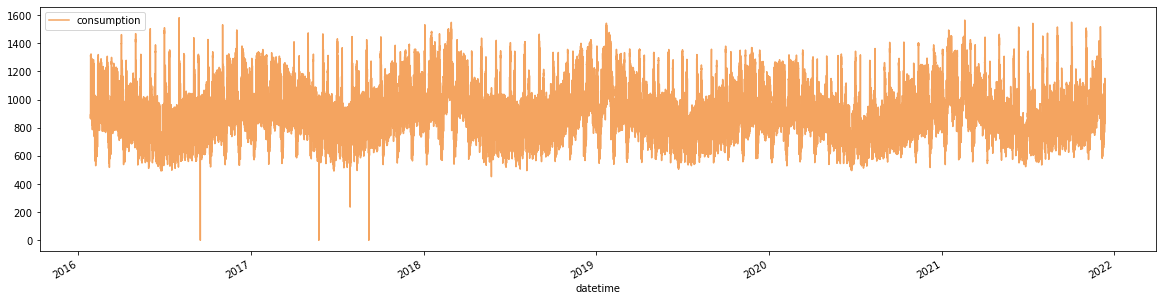

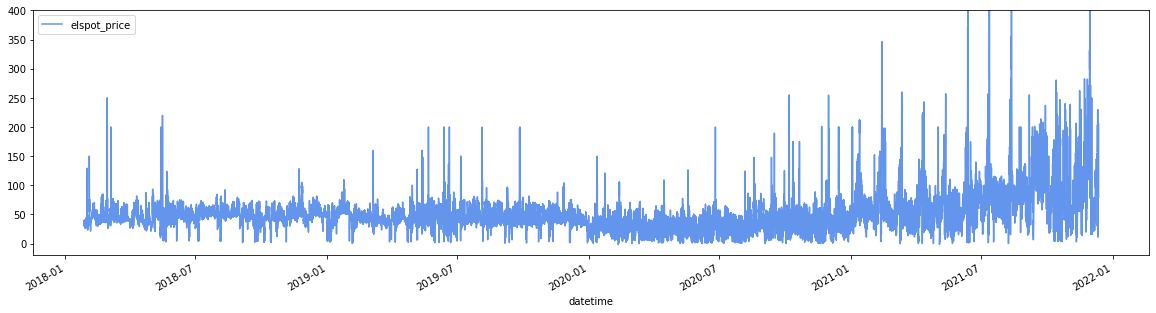

In [6]:
# Plotting the graphs
consumption = nordpool.drop("elspot_price", axis = 1)
prices = nordpool.drop("consumption", axis = 1)

consumption["2016-01-27":"2021-12-20"].plot(figsize=(20,5), color="sandybrown");
prices["2018-01-27":"2021-12-20"].plot(ylim = (-20, 400), figsize=(20, 5), color="cornflowerblue");

## First data visualization conclusions

It is clear that correlation between spot market electricity prices and energy consumption clearly exists and grows stronger over time. From around 2021-01 visible overlap is seen more and more.

## COVID-19 impact on energy consumption

### Overview 

COVID-19 had a big impact on the majority of the population and how the society functions as a system, therefore influencing the energy industry. On the macro-level, major industrial and commercial demands decrease because of the government imposed lockdowns and regulations. On the micro-level however, things are totally different. People started to work from home when possible therefore substantially increasing the residential energy demands [2]. Though it is not possible for the increased residential demand to mitigate the negative effects caused by macro-level demand decline. This implies an overall decrease in energy demand and is backed by multiple studies. For example, largest world energy demand decline since World War II happened just a year ago, in 2020 [3].

Although 2020 was a bad year for the energy industry, 2021 turned out to be a lot more positive in that regard. After relaxation of lockdown regulations, emerge of vaccines and overall societal adaptation to COVID-19, energy demand has seen a major rebound and recovery from the lows of 2020 as a result.

Text(0, 0.5, 'Change in %')

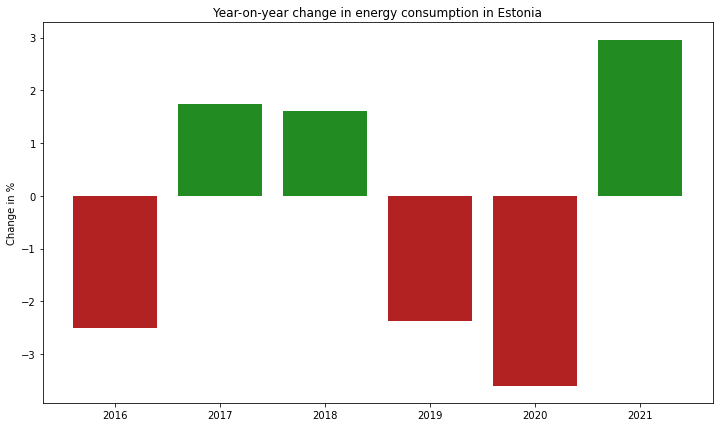

In [7]:
# Bar-chart for the 2016-2021 period
year = 2016
years = []
changes = []
colors = []

for i in range(6):
    mean_before = consumption[str(year - 1) + "-01-01":str(year) + "-01-01"].mean()
    mean_now = consumption[str(year) + "-01-01":str(year + 1) + "-01-01"].mean()
    change = float(((mean_now / mean_before) - 1) * 100)
    years.append(year)
    changes.append(change)
    year += 1
    if change < 0:
        colors.append("firebrick")
    else:
        colors.append("forestgreen")

consumption_changes = pd.DataFrame({"years":years,"changes":changes, "colors":colors})
f, ax = plt.subplots(figsize=(12,7))
plt.bar(consumption_changes["years"], consumption_changes["changes"], color=consumption_changes["colors"])
plt.title("Year-on-year change in energy consumption in Estonia")
plt.ylabel("Change in %")


As shown in the graph, Estonia is no exception to overall worldwide decrease in energy demand when the COVID-19 outbreak first occurred in 2020. The next year is also inline with the global trends in regards of energy demand stabilization and recovery from the 2020 major decrease.

In [8]:
# To be exact, change in 2020 energy consumption compared to 2019 mean is as follows (in %):
print(float(consumption_changes.loc[consumption_changes["years"] == 2020]["changes"]))

-3.596958879434209


## 2020 analysis

First COVID-19 case was discovered in Wuhan, China. It didn't take long for it to turn into a worldwide pandemic, spreading to many countries, including Estonia. As a result, government had to react in some way or another, imposing curtailment measures and implementing lockdowns.

<Figure size 720x360 with 0 Axes>

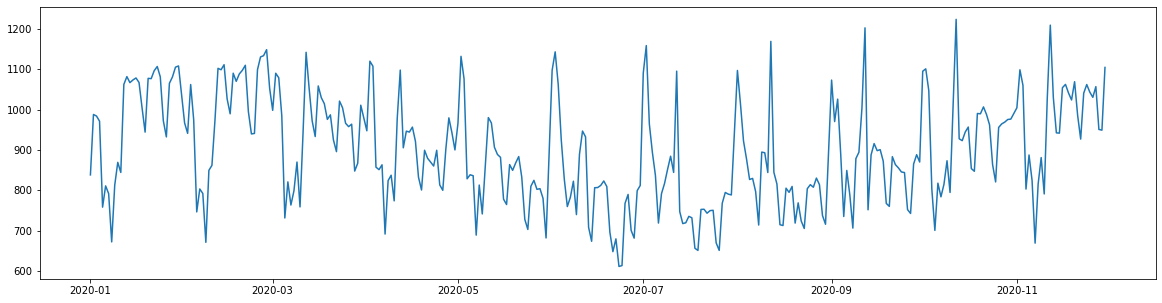

<Figure size 720x360 with 0 Axes>

In [32]:
def generalize_to_day_means(year):
    year = str(year)
    means = []
    dates = []
    for i in range(1, 12):
        for j in range(1, 31):

            month = str(i)
            day = str(j)

            try:
                mean = float(consumption[year + "-" + month + "-" + day].mean())
                date = pd.to_datetime(year + "-" + month + "-" + day)
                means.append(mean)
                dates.append(date)
            except:
                break
    return means, dates


means, dates = generalize_to_day_means(2020)
f, ax = plt.subplots(figsize=(20,5))            
consumption_early_2020 = pd.DataFrame({"dates":dates,"means":means}) 
consumption_early_2020.set_index("dates")
plt.plot(consumption_early_2020["dates"], consumption_early_2020["means"])
plt.figure(figsize=(10, 5))

Given figure is composed of average energy consumption per day and it is clearly seen that after the winter months energy consumption declines rapidly. Though it is hard to measure COVID-19 impact on the energy demand decline because timeframe of first government imposed regulations overlaps with winter months ending. After the winter months people use less heaters, lamps etc so naturally energy demand decreases.

In [33]:
def consumption_year_graph(year):
    means = []
    dates = []
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    year = str(year)
    for i in range(1, 13):
        month = str(i)
        mean = float(consumption[year + "-" + month].mean())
        date = pd.to_datetime(year + "-" + month)
        means.append(mean)
        dates.append(date)
    
    f, ax = plt.subplots(figsize=(12,7))
    consumption_year = pd.DataFrame({"dates":dates,"means":means})
    consumption_year.head(20)
    consumption_year.set_index("dates")
    plt.plot(consumption_year['dates'], consumption_year['means'])
    return consumption_year

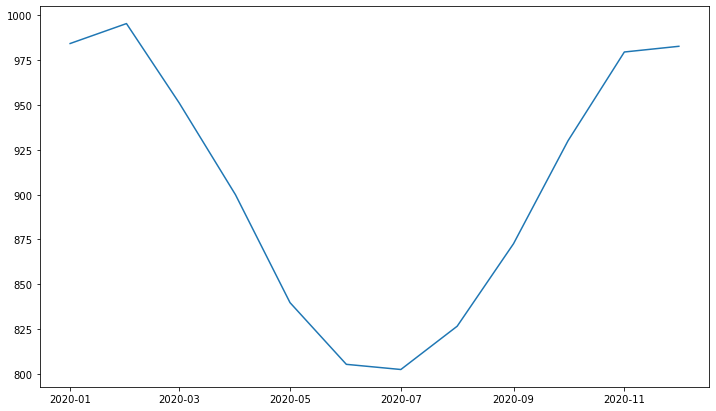

In [121]:
cons = consumption_year_graph(2020)

This graph contains less noise than the previous one. The dip in energy demand after the winter months is clearly visible. Now it will be useful to compare that to previous years, before COVID-19 pandemic, to evaluate COVID-19 impact on the energy demand.

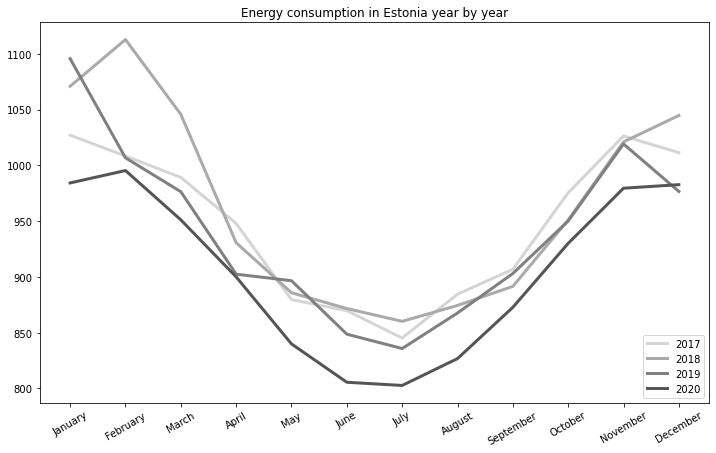

In [131]:
def consumption_years_graph(n_of_years, final_year):
    colors = plt.cm.gray(np.linspace(0,1,n_of_years + 3))
    years = str(final_year - (n_of_years - 1))
    year_legend = []
    f, ax = plt.subplots(figsize=(12,7))
    for j in range(n_of_years):
        years = str(years)
        means = []
        dates = []
        months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
        for i in range(1, 13):
            
            
            month = str(i)
            mean = float(consumption[years + "-" + month].mean())
            date = pd.to_datetime(years + "-" + month)
            means.append(mean)
            dates.append(date)
       
        consumption_year = pd.DataFrame({"dates":dates,"means":means, "months":months})
        consumption_year.set_index("dates")
        plt.plot(consumption_year["months"], consumption_year["means"], color=colors[(n_of_years + 1) - j], linewidth=3)
        plt.xticks(rotation = 30)
        year_legend.append(years)
        years = int(years) + 1
    
    plt.title("Energy consumption in Estonia year by year")
    plt.legend(year_legend, loc=4)
consumption_years_graph(4, 2020)    

Now it is quite easy to spot how COVID-19 affected energy demand in Estonia. For example in June 2019 energy demand resulted in approximately 850MW while in 2020, after the outbreak, it resulted in about <800MW, which is a 6% deviation from the previous year due to COVID-19 pandemic. In the years prior to 2020, energy consumption decline reduced around May, which could be because of both macro-level and micro-level energy demand rebound caused by internal residential cooling systems as well as longer working hours of shops, bars and other public places coupled with population's more active lifestyle due to positive weather changes. In 2020 however, then again, lockdowns, safety measures crippled social events and previous pre-COVID lifestyle.

### COVID-19 lockdowns impact on energy demand in Estonia

Text(0.5, 1.0, 'Energy consumption in early to mid 2019')

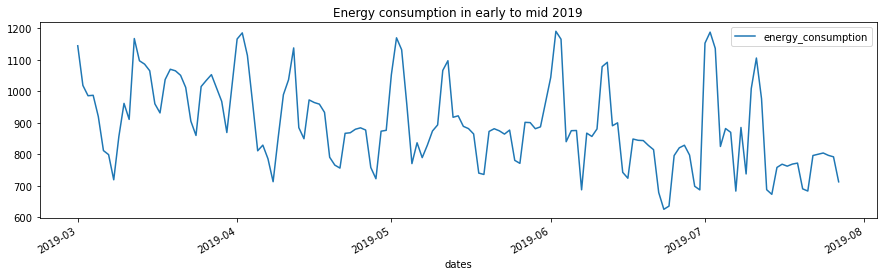

In [118]:
means_2019, dates_2019 = generalize_to_day_means(2019)          
consumption_early_2019 = pd.DataFrame({"dates":dates_2019,"energy_consumption":means_2019}) 
consumption_early_2019 = consumption_early_2019.set_index("dates")
consumption_early_2019["2019-03-01":"2019-07-27"].plot(figsize=(15,4))
plt.title("Energy consumption in early to mid 2019")

Before jumping into 2020, it might be useful to compare 2020 to previous year once again, which may assist in spotting anomalies.

From this graph of energy consumption in early to mid 2019 it is easy to conclude that energy demand peaks around the end of each month.

Text(0.5, 1.0, 'Energy consumption in early to mid 2020, Estonia')

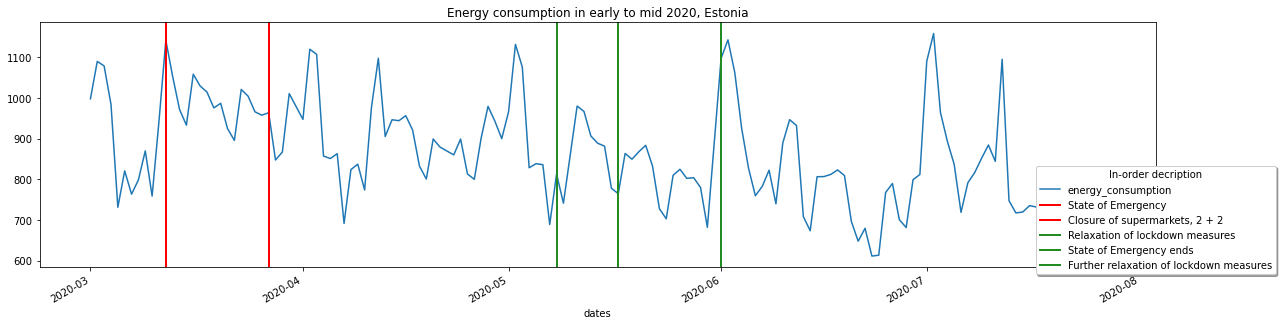

In [110]:
means_2020, dates_2020 = generalize_to_day_means(2020)          
consumption_early_2020 = pd.DataFrame({"dates":dates_2020,"energy_consumption":means_2020}) 
consumption_early_2020 = consumption_early_2020.set_index("dates")
consumption_early_2020["2020-03-01":"2020-07-27"].plot(figsize=(20,5))


plt.axvline(x="2020-03-12", color="red", label="State of Emergency", linewidth = 2)
plt.axvline(x="2020-03-27", color="red", label="Closure of supermarkets, 2 + 2", linewidth = 2)
plt.axvline(x="2020-05-08", color="forestgreen", label="Relaxation of lockdown measures", linewidth = 2)
plt.axvline(x="2020-05-17", color="forestgreen", label="State of Emergency ends", linewidth = 2)
plt.axvline(x="2020-06-01", color="forestgreen", label="Further relaxation of lockdown measures", linewidth = 2)
plt.legend(loc='lower center', bbox_to_anchor=(1, -0.05),
          fancybox=True, shadow=True, ncol=1, title="In-order decription")
plt.title("Energy consumption in early to mid 2020, Estonia")

First person that contracted COVID-19 in Estonia was discovered on 27th of February. It didn't take long for the virus to spread and state of emergency was declared 12th of March, 2020. 

* **27.02.2020** - First person that contracted COVID-19 in Estonia was discovered on 27th of February
* **12.03.2020** - State of emergency declared by the Estonian government

The COVID-19 had 27 confirmed cases in Estonia. Võru city                    government decided to close all schools, kindergardens and                     other public places for safety measures. In the following days, as COVID-19 cases rises quickly, Estonian government enforces quarantine for its islands allowing travel to the islands only for the locals.

By 17th of March, 2020, there are 225 confirmed cases and government decides to prohibit entry to Estonia for foreigners.

After the state of emergency is declared, energy demand starts to decline, although in the overall picture the decline is not that steep. Since this is the start of the pandemic, people naturally generally avoided crowded places (not mentioning food markets, as panic rises people started to haul more products), social events were post-poned, which implies less energy demand, though, not that much.

* **27.03.2020** - Government announced 2 + 2 policy and closure of supermarkets

There are 640 confirmed cases of COVID-19. Most of the public places are now closed, only pharmacies and food shops are still open. 

It would make sense for the energy consumption to go down after the close of supermarkets but in reality energy demand started to rise, which is not that surprising considering it is normal for energy consumption to suddenly increase at the start of the month. It is also complicated to assess multiple sides of the coin because as mentioned before, when macro-scale demand decreases, micro-level demand increases. It is hard to tell which has more influence in that specific timeframe.
* **08.05.2020** - Government announced relaxation of lockdown measures

Tallinn gradually opens playgrounds and training courts. Though to the 30th of june all public events still prohibited. There is a relatively big spike in electricity demand after this announcement by the Estonian government.
* **17.05.2020** - State of Emergency ends

It is quite possible that the end of state of emergency contributed to that slight increase in emergency demand.

It is now possible to gather up to 100 people on public events. Beaches are open.
* **01.06.2020** - Further lockdown measure relaxation

It is now possible to gather up to 100 people on public events. Beaches are open.

There is a sudden spike in electricity demand. Nothing unusual once again, this is the start of the month after all. Considering the timing it is hard to assess how much of that electricity demand increase is due to the relaxation measures given by the Estonian government, if at all.

### Conclusion

Closer look at the Estonian energy demand from early to mid 2020 unfortunately raises more questions than it answers. Energy demand is composed of many factors, the economy, weather and many more. On one hand, there were mostly declines in energy demand after government announced restrictions, on the other hand it is hard to assess how much of that decline is attributed to the aforementioned restrictions.

Considering lockdown relaxation measures however, there is an easy-to-spot upward trend after the relaxations. It makes sense for a number of reasons, less restrictions implies more activities in public places and so on, which all require energy to function, therefore increasing the energy demand. It should be definitely taken with a grain of salt, because compared to the same timeline from the previous year, 2019, the overall picture looks the same. It would be wise to view government imposed safety measure relaxations as a multiplier for driving the energy demand upwards, rather than a reason for why demand decides to move upwards, not downwards.

## 2021 analysis

2021 was a much better year for the energy sector compared to the 2020 for various reasons. For example, wide adoption of vaccines, public places opening for the most part, social events and much more contributed to the higher demand of electricity. 

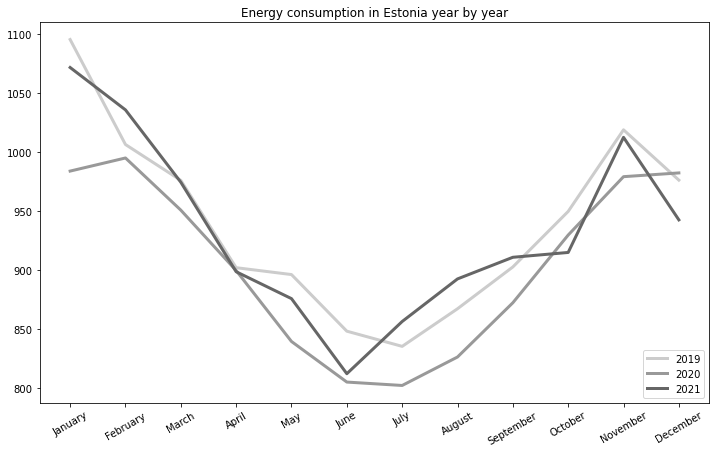

In [138]:
cons = consumption_years_graph(3, 2021)

Winter of 2020/2021 was harsh as second wave of coronavirus pandemic hit, which led to renewal of economic closures and lockdowns. It explains why in the first half of 2021 energy demand wasn't that much higher than in the timeframe of the first-wave.

However, starting from around mid 2021 things change drastically for the best as Estonian COVID-19 situation continues to stabilize.

Given graph confirms that energy demand has seen a major rebound from the mid of 2021 and has risen faster (around June to September) than years before COVID-19. 

## References
1. Klemeš JJ, Fan YV, Jiang P, Impacts of COVID-19 on energy demand and consumption: Challenges, lessons and emerging opportunities https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7834155/
2.  Senthilkumar V.S., Reddy K.S., Subramaniam U. COVID-19: Impact analysis and recommendations for power and energy sector operation https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7834155/
3. Global Energy Review, https://iea.blob.core.windows.net/assets/d0031107-401d-4a2f-a48b-9eed19457335/GlobalEnergyReview2021.pdf
4. Chronology of events, COVID-19 pandemic in Estonia (in estonian), https://et.wikipedia.org/wiki/Koroonapandeemia_kronoloogia_Eestis